In [93]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from sklearn import model_selection
import pandas as pd

In [81]:
X, y = make_blobs(n_samples=2000, cluster_std=1.5, n_features=3, centers=5,  
                            random_state=19850725)

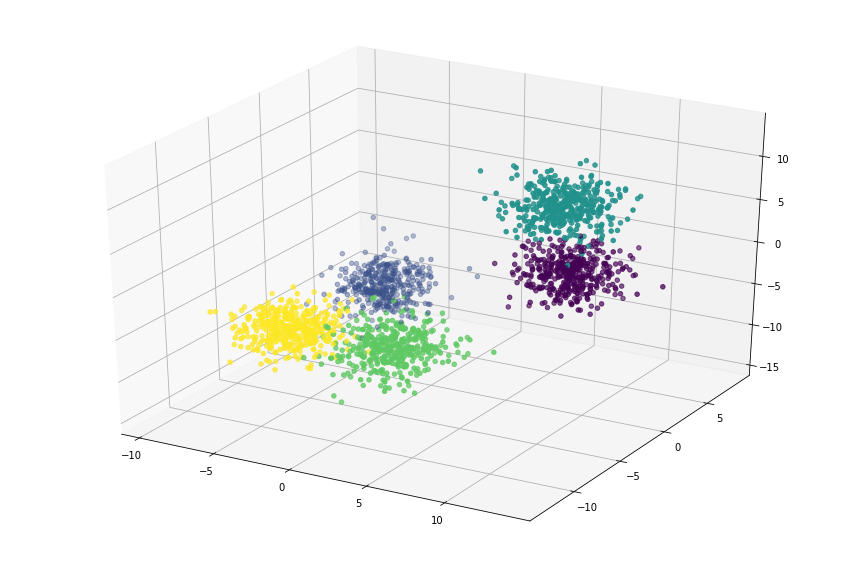

In [89]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y, marker='o')

plt.show()

In [121]:
splitter =  model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.25)
splits = list(splitter.split(X=X,y=y))
train_index = splits[0][0]
test_index = splits[0][1]

train_df = pd.DataFrame(X[train_index])
train_df['cluster'] = y[train_index]
print(len(train_df))


test_df = pd.DataFrame(X[test_index])
test_df['cluster'] = y[test_index]
print(len(test_df))

1500
500


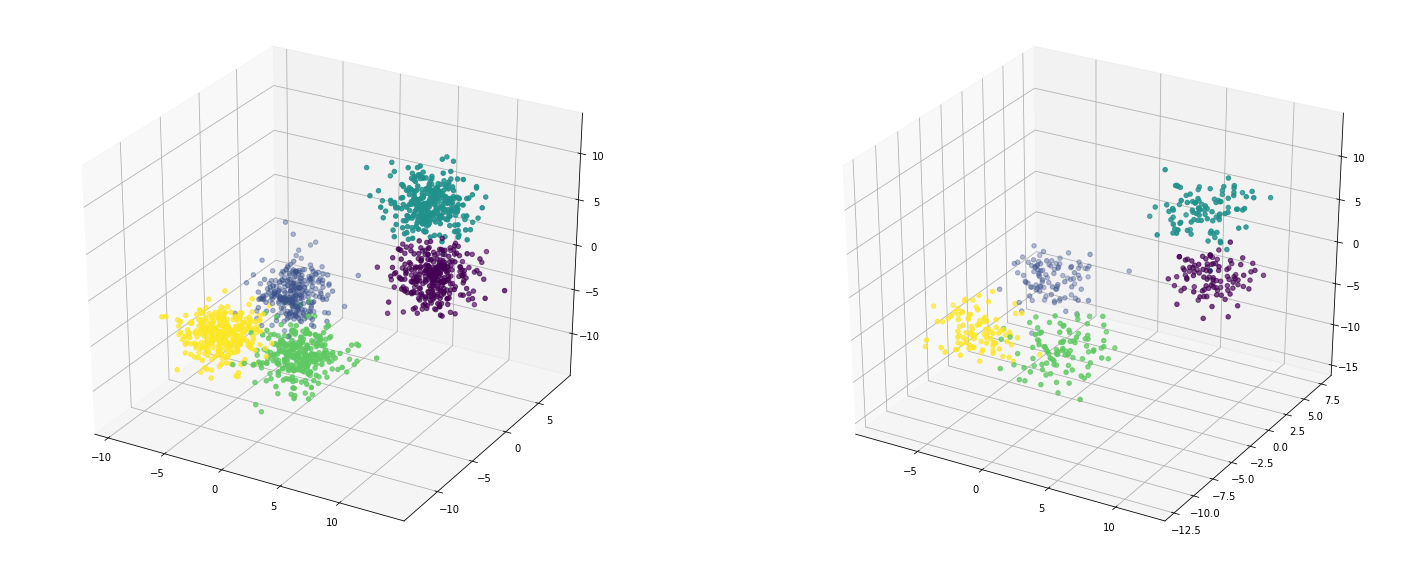

In [126]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')

ax.scatter(train_df.iloc[:,0], train_df.iloc[:,1], train_df.iloc[:,2], c=train_df['cluster'], marker='o')

ax = fig.add_subplot(122, projection='3d')

ax.scatter(test_df.iloc[:,0], test_df.iloc[:,1], test_df.iloc[:,2], c=test_df['cluster'], marker='o')

plt.show()

In [124]:
train_df.to_csv(path_or_buf="data/train-data.csv", header=False, index=True)
test_df.to_csv(path_or_buf="data/test-data.csv", header=False, index=True)

In [166]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=100)
k_means.fit(train_df.iloc[:,[0,1,2]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [174]:
training_assigments = k_means.predict(train_df.iloc[:,[0,1,2]])
test_assigments = k_means.predict(test_df.iloc[:,[0,1,2]])
print(training_assigments[0:100])

[0 0 0 1 0 1 1 2 0 1 1 0 1 1 0 0 0 2 0 0 2 0 2 0 0 0 2 1 0 0 1 1 1 1 0 2 2
 1 0 2 2 2 0 1 0 2 0 1 2 1 0 0 0 1 1 2 0 1 0 1 0 0 1 0 0 1 2 2 0 1 2 0 0 0
 2 1 0 0 1 1 0 0 1 1 0 1 0 2 0 1 1 0 0 0 0 0 0 0 1 1]


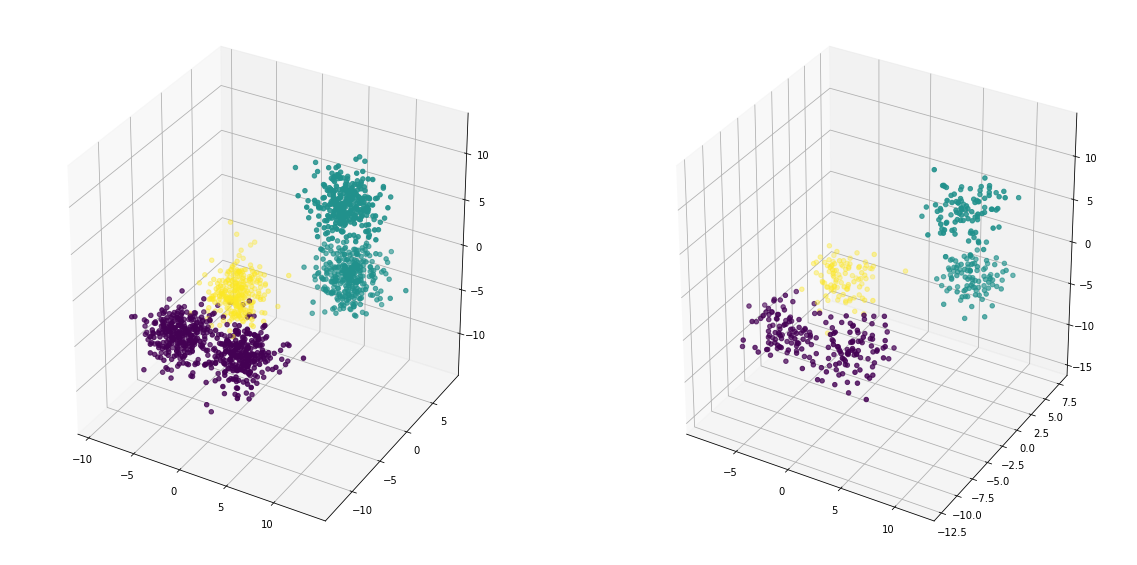

In [168]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')

ax.scatter(train_df.iloc[:,0], train_df.iloc[:,1], train_df.iloc[:,2], c=training_assigments, marker='o')

ax = fig.add_subplot(122, projection='3d')

ax.scatter(test_df.iloc[:,0], test_df.iloc[:,1], test_df.iloc[:,2], c=test_assigments, marker='o')

plt.show()

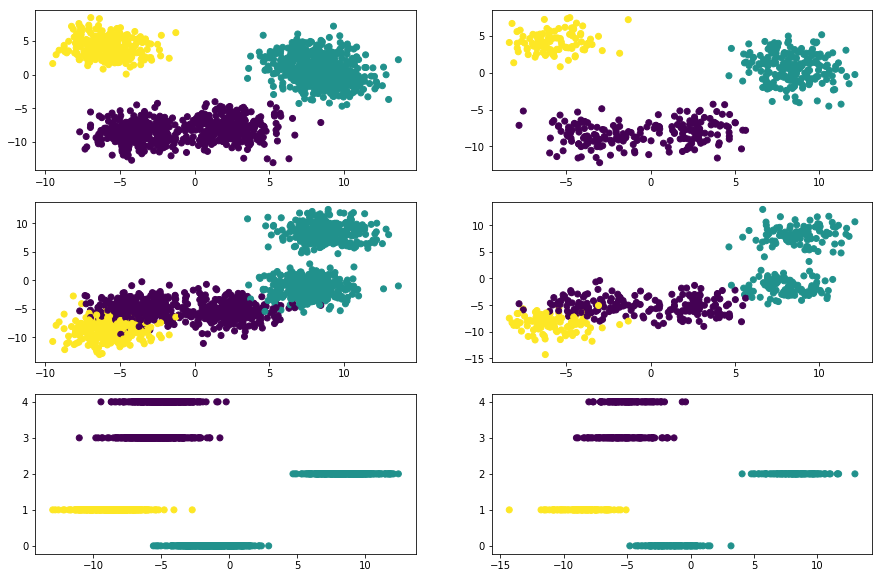

In [169]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(321)
ax.scatter(train_df.iloc[:,0], train_df.iloc[:,1], c=training_assigments, marker='o')

ax = fig.add_subplot(322)
ax.scatter(test_df.iloc[:,0], test_df.iloc[:,1], c=test_assigments, marker='o')

ax = fig.add_subplot(323)
ax.scatter(train_df.iloc[:,0], train_df.iloc[:,2], c=training_assigments, marker='o')

ax = fig.add_subplot(324)
ax.scatter(test_df.iloc[:,0], test_df.iloc[:,2], c=test_assigments, marker='o')

ax = fig.add_subplot(325)
ax.scatter(train_df.iloc[:,2], train_df.iloc[:,3], c=training_assigments, marker='o')

ax = fig.add_subplot(326)
ax.scatter(test_df.iloc[:,2], test_df.iloc[:,3], c=test_assigments, marker='o')

plt.show()